In [1]:
import numpy as np
import os
from collections import OrderedDict
from scipy.io import wavfile
import re
import pickle as pkl

import tables
import os
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
def correct_pos(pos):
    if pos == 0:
        pos = 1
    if pos == 18:
        pos = 17
    return pos

In [ ]:
basedir = '/Volumes/Elements/TIDIGITS/'
mtr = 'CD1/TIDIGITS/TRAIN/MAN/'
ftr = 'CD1/TIDIGITS/TRAIN/WOMAN/'
mte = 'CD2/TIDIGITS/TEST/MAN/'
fte = 'CD2/TIDIGITS/TEST/WOMAN/'

old_separator = '/'
new_separator = '\\'

D = {'train': {'m': {}, 'f': {}}, 'test': {'m': {}, 'f': {}}}
for path, task, gender in zip([mtr, ftr, mte, fte], ['train', 'train', 'test', 'test'], ['m', 'f', 'm', 'f']):
    _list = [i for i in os.listdir(basedir + path)if len(i) == 2]
    for spk in _list:
        _wavs = [i for i in os.listdir(basedir + path + spk + '/') if "WAV" in i]
        D[task][gender][spk] = [path + spk + '/' + i for i in _wavs]

to_digit = {'O': 0,'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'Z': 0}

In [ ]:
n_samples = 6000
with open('train_set.txt', 'w') as wavs:
    for i in range(n_samples):
        rnd_gnd1 = np.random.choice(['m', 'f'])
        rnd_spk1 = np.random.choice(D['train'][rnd_gnd1].keys())
        rnd_wav1 = np.random.choice(D['train'][rnd_gnd1][rnd_spk1])
        
        rnd_gnd2 = np.random.choice(['m', 'f'])
        rnd_spk2 = np.random.choice(D['train'][rnd_gnd2].keys())
        rnd_wav2 = np.random.choice(D['train'][rnd_gnd2][rnd_spk2])
        
        ann1 = "".join([str(to_digit[i]) for i in rnd_wav1.split('/')[-1][:-5]])
        ann2 = "".join([str(to_digit[i]) for i in rnd_wav2.split('/')[-1][:-5]])
        nn = rnd_spk1 + ann1 + rnd_spk2 + ann2
        wavs.write(rnd_wav1.replace(old_separator, new_separator) + ' ' + rnd_wav2.replace(old_separator, new_separator) + ' ' + ann1 + ' ' + ann2 + ' ' + nn +'\n')
        
        
    

In [ ]:
n_samples = 2000
with open('test_set.txt', 'w') as wavs:
    for i in range(n_samples):
        rnd_gnd1 = np.random.choice(['m', 'f'])
        rnd_spk1 = np.random.choice(D['test'][rnd_gnd1].keys())
        rnd_wav1 = np.random.choice(D['test'][rnd_gnd1][rnd_spk1])
        
        rnd_gnd2 = np.random.choice(['m', 'f'])
        rnd_spk2 = np.random.choice(D['test'][rnd_gnd2].keys())
        rnd_wav2 = np.random.choice(D['test'][rnd_gnd2][rnd_spk2])
        
        ann1 = "".join([str(to_digit[i]) for i in rnd_wav1.split('/')[-1][:-5]])
        ann2 = "".join([str(to_digit[i]) for i in rnd_wav2.split('/')[-1][:-5]])
        
        nn = rnd_spk1 + ann1 + rnd_spk2 + ann2
        
        wavs.write(rnd_wav1.replace(old_separator, new_separator) + ' ' + rnd_wav2.replace(old_separator, new_separator) + ' ' + ann1 + ' ' + ann2 + ' ' + nn + '\n')
        

In [ ]:
# log_mix
with open('train_set.txt', 'r') as wavs, open('description_log_mix.csv', 'w') as csv, open('test_set.txt', 'r') as wavs_t:
    csv.write('mode,group,modality,key,channel,path,label\n')
    count = 0
    for l in wavs.readlines():
        _, utt1, utt2 = re.compile('[A-Z]+').split(l.split(' ')[-1])
        
        csv.write('default,train,audio,train_{},1,'.format(count))
        csv.write('train/' + l.split(' ')[-1].strip() + '.wav,')
        csv.write(utt1.replace('0', 'Z') + utt2.replace('0', 'Z'))
        count += 1
    
    count = 0
    for l in wavs_t.readlines():
        _, utt1, utt2 = re.compile('[A-Z]+').split(l.split(' ')[-1])
        
        csv.write('default,test,audio,test_{},1,'.format(count))
        csv.write('test/' + l.split(' ')[-1].strip() + '.wav,')
        csv.write(utt1.replace('0', 'Z') + utt2.replace('0', 'Z'))
        count += 1

        

In [ ]:
# separated original fbank of only the registered ones
with open('train_set.txt', 'r') as wavs, open('description_sep_log.csv', 'w') as csv, open('test_set.txt', 'r') as wavs_t:
    csv.write('mode,group,modality,key,channel,path,label\n')
    count = 0
    for l in wavs.readlines():
        utt1, utt2 = l.split(' ')[2], l.split(' ')[3]
        
        csv.write('default,train,audio,train_{},1,'.format(count))
        csv.write('train/' + l.split(' ')[0].strip().replace('\\', '/') + '.wav,')
        csv.write(utt1.replace('0', 'Z') + '\n')
        count += 1
        
        csv.write('default,train,audio,train_{},1,'.format(count))
        csv.write('train/' + l.split(' ')[1].strip().replace('\\', '/') + '.wav,')
        csv.write(utt2.replace('0', 'Z') + '\n')
        count += 1
    
    count = 0
    for l in wavs_t.readlines():
        utt1, utt2 = l.split(' ')[2], l.split(' ')[3]
        
        csv.write('default,test,audio,test_{},1,'.format(count))
        csv.write('test/' + l.split(' ')[0].strip().replace('\\', '/') + '.wav,')
        csv.write(utt1.replace('0', 'Z') + '\n')
        count += 1
        
        csv.write('default,test,audio,test_{},1,'.format(count))
        csv.write('test/' + l.split(' ')[1].strip().replace('\\', '/') + '.wav,')
        csv.write(utt2.replace('0', 'Z') + '\n')
        count += 1

        

In [ ]:
# mixed spike fuatures
with open('description_spk_mix.csv', 'w') as csv, open('train_set.txt', 'r') as wavs, open('test_set.txt', 'r') as wavs_t:
    
    csv.write('mode,group,modality,key,channel,path,label\n')
    count = 0
    for l in wavs.readlines():
        utt1, utt2 = l.split(' ')[2], l.split(' ')[3]
        csv.write('default,train,feat,train_{},1,{},{}\n'.format(count, count, utt1.replace('0', 'Z') + utt2.replace('0', 'Z')))
        count += 1
        
    count = 0
    for l in wavs_t.readlines():
        utt1, utt2 = l.split(' ')[2], l.split(' ')[3]
        csv.write('default,test,feat,test_{},1,{},{}\n'.format(count, count, utt1.replace('0', 'Z') + utt2.replace('0', 'Z')))
        count += 1

In [ ]:
# separated spike features
basedir = '/Data/DATASETS/CAESAR_TIDIGITS/'
data_train = pkl.load(open('all_sep_spk_train.pkl', 'r'))
data_test = pkl.load(open('all_sep_spk_test.pkl', 'r'))
ALL_ANGLES = {}

with open('description_spk_sep.csv', 'w') as csv:
    csv.write('mode,group,modality,key,channel,path,label\n')
    count = 0
    for i, l in enumerate(data_train['lbl']):
        csv.write('default,train,feat,train_{},1,{},{}\n'.format(count, count, l.replace('0', 'Z')))
        count += 1
        
    count = 0
    for i, l in enumerate(data_test['lbl']):
        csv.write('default,test,feat,test_{},1,{},{}\n'.format(count, count, l.replace('0', 'Z')))
        count += 1

# filter for same position or adjacient position

with open(basedir + 'log_train.txt') as t:
    ALL_ANGLES['train'] = [x for x in t.readlines()]

with open(basedir + 'log_test.txt') as t:
    ALL_ANGLES['test'] = [x for x in t.readlines()]

with open('description_spk_sep_noADJ.csv', 'w') as csv:
    to_do_train = []
    for l in ALL_ANGLES['train']:
        pos1, pos2 = int(float(l.split(' ')[1]) // 10) , int(float(l.split(' ')[2]) // 10)
        pos1, pos2 = correct_pos(pos1), correct_pos(pos2)
        if np.abs(pos1 - pos2) > 1:
            to_do_train.append(True)
            to_do_train.append(True)
        else:
            to_do_train.append(False)
            to_do_train.append(False)
            
    to_do_test = []
    for l in ALL_ANGLES['test']:
        pos1, pos2 = int(float(l.split(' ')[1]) // 10) , int(float(l.split(' ')[2]) // 10)
        pos1, pos2 = correct_pos(pos1), correct_pos(pos2)
        if np.abs(pos1 - pos2) > 1:
            to_do_test.append(True)
            to_do_test.append(True)
        else:
            to_do_test.append(False)
            to_do_test.append(False)
        
    csv.write('mode,group,modality,key,channel,path,label\n')
    count = 0
    for i, l in enumerate(data_train['lbl']):
        if to_do_train[i]:
            csv.write('default,train,feat,train_{},1,{},{}\n'.format(count, count, l.replace('0', 'Z')))
            count += 1

    count = 0
    for i, l in enumerate(data_test['lbl']):
        if to_do_test[i]:
            csv.write('default,test,feat,test_{},1,{},{}\n'.format(count, count, l.replace('0', 'Z')))
            count += 1

In [62]:
# v07
# separated spike features
basedir = '/Data/DATASETS/CAESAR_TIDIGITS/'
data_train = pkl.load(open('all_sep_spk_train_77__v07.pkl', 'r'))
data_test = pkl.load(open('all_sep_spk_test_77__v07.pkl', 'r'))


with open('description_spk_sep_v07.csv', 'w') as csv:
        
    csv.write('mode,group,modality,key,channel,path,label\n')
    count = 0
    for i, l in enumerate(data_train['lbl']):
        csv.write('default,train,feat,train_{},1,{},{}\n'.format(count, count, l.replace('0', 'Z')))
        count += 1

    count = 0
    for i, l in enumerate(data_test['lbl']):
        csv.write('default,test,feat,test_{},1,{},{}\n'.format(count, count, l.replace('0', 'Z')))
        count += 1

In [7]:
# v07
# separated spike features
basedir = '/Data/DATASETS/CAESAR_TIDIGITS/'
data_train = pkl.load(open('all_sep_spk_train_77__v07.pkl', 'r'))
data_test = pkl.load(open('all_sep_spk_test_77__v07.pkl', 'r'))

no_wake = ['0', 'Z', '1', '2', '3', '4', '5', '6', '8', '9']

with open('description_spk_sep_77_v07.csv', 'w') as csv:
        
    csv.write('mode,group,modality,key,channel,path,label\n')
    count = 0
    for i, l in enumerate(data_train['lbl']):
        csv.write('default,train,feat,train_{},1,{},{}\n'.format(count, count, replaceMultiple(l, no_wake, '1')))
        count += 1

    count = 0
    for i, l in enumerate(data_test['lbl']):
        csv.write('default,test,feat,test_{},1,{},{}\n'.format(count, count, replaceMultiple(l, no_wake, '1')))
        count += 1

In [180]:
def replaceMultiple(mainString, toBeReplaces, newString):
    # Iterate over the strings to be replaced
    for elem in toBeReplaces :
        # Check if string is in the main string
        if elem in mainString :
            # Replace the string
            mainString = mainString.replace(elem, newString)
    
    return  mainString

def collapseSame(s):
    last = ''
    news = ''
    for i in s:
        if i != last:
            news += i
            last = i
    return news
str1 = 'aaadefabcdefabcdef'
print collapseSame(replaceMultiple(str1, ['0', 'Z','c'], '0'))

adefab0defab0def


In [262]:
lbl_train = pkl.load(open('all_spk_train_777log__v07.pkl', 'r'))['lbl']
lbl_test = pkl.load(open('all_spk_test_777log__v07.pkl', 'r'))['lbl']

wake_train = []
no_wake_train = []
wake_test = []
no_wake_test = [] 

wake_word = '7'

for l, k in enumerate(lbl_train):
#     if len(k) < 7:
    if wake_word in k:
        wake_train.append(l)
    else:
        no_wake_train.append(l)
        
for l, k in enumerate(lbl_test):
#     if len(k) < 7:
    if wake_word in k:
        wake_test.append(l)
    else:
        no_wake_test.append(l)

# print len(wake_train)
# print len(no_wake_train)
# print len(wake_test)
# print len(no_wake_test)

wake_train = list(np.random.choice(wake_train, len(wake_train), replace=False))
no_wake_train = list(np.random.choice(no_wake_train, len(wake_train), replace=False))
wake_test = list(np.random.choice(wake_test, len(wake_test), replace=False))
no_wake_test = list(np.random.choice(no_wake_test, len(wake_test), replace=False))

# print len(wake_train)
# print len(no_wake_train)
# print len(wake_test)
# print len(no_wake_test)

wake_train.extend(no_wake_train)
wake_test.extend(no_wake_test)

print len(wake_train)
print len(wake_test)

4466
4468


In [263]:
# lbl_train = pkl.load(open('all_sep_spk_train_77__v07.pkl', 'r'))['lbl']
# lbl_test = pkl.load(open('all_sep_spk_test_77__v07.pkl', 'r'))['lbl']

basedir = '/Data/DATASETS/CAESAR_TIDIGITS/'
# lbl_train = pkl.load(open('all_sep_spk_train_77__v07.pkl', 'r'))['lbl']
# lbl_test = pkl.load(open('all_sep_spk_test_77__v07.pkl', 'r'))['lbl']

no_wake = ['0', 'Z', '1', '2', '3', '4', '5', '6', '7', '8', '9']
no_wake.remove(wake_word)

with open('description_spk_{}{}_v07_balance_wake_short_collapse.csv'.format(wake_word, wake_word), 'w') as csv:
        
    csv.write('mode,group,modality,key,channel,path,label\n')
    count = 0
    for i, l in enumerate(wake_train):
        csv.write('default,train,feat,train_{},1,{},{}\n'.format(count, l, collapseSame(replaceMultiple(lbl_train[l], no_wake, '1'))))
        count += 1

    count = 0
    for i, l in enumerate(wake_test):
        csv.write('default,test,feat,test_{},1,{},{}\n'.format(count, l, collapseSame(replaceMultiple(lbl_test[l], no_wake, '1'))))
        count += 1

with open('units_{}.txt'.format(wake_word), 'w') as csv:
    csv.write('1 1\n')
    csv.write('{} 2\n'.format(wake_word))

In [ ]:
# projected spike features
data_train = pkl.load(open('all_log_prj_train.pkl', 'r'))
data_test = pkl.load(open('all_log_prj_test.pkl', 'r'))

with open('description_log_prj.csv', 'w') as csv:
    csv.write('mode,group,modality,key,channel,path,label\n')
    count = 0
    for i, l in enumerate(data_train['lbl']):
        csv.write('default,train,feat,train_{},1,{},{}\n'.format(count, count, l.replace('0', 'Z')))
        count += 1
        
    count = 0
    for i, l in enumerate(data_test['lbl']):
        csv.write('default,test,feat,test_{},1,{},{}\n'.format(count, count, l.replace('0', 'Z')))
        count += 1

In [ ]:
import tables
h5file = '/Data/Dropbox/tidigits_kaldi_fbank.h5'

h5 = tables.open_file(h5file, 'r')
dataset = h5.get_node(os.path.join(os.sep, 'default', 'train'))

channels = h5.list_nodes(os.path.join(os.sep, 'default', 'train'))

print len(channels[0].features)
print channels[0].label[0]
print channels[0].label_length[0]

In [ ]:
import tables
import os
h5file = '/Data/DATASETS/CAESAR_TIDIGITS/tidigits_spk_sep.h5'

h5 = tables.open_file(h5file, 'r')
dataset = h5.get_node(os.path.join(os.sep, 'default', 'train'))

channels = h5.list_nodes(os.path.join(os.sep, 'default', 'train'))

print len(channels[0].features)
print channels[0].label[1]
print channels[0].label_length[1]

In [ ]:
subset = 'test'
h5 = tables.open_file('/Data/DATASETS/CAESAR_TIDIGITS/tidigits_log_sep.h5', 'r')
log_sep = h5.list_nodes(os.path.join(os.sep, 'default', subset))
h5 = tables.open_file('/Data/DATASETS/CAESAR_TIDIGITS/tidigits_log_mix.h5', 'r')
log_mix = h5.list_nodes(os.path.join(os.sep, 'default', subset))
h5 = tables.open_file('/Data/DATASETS/CAESAR_TIDIGITS/tidigits_spk_sep_v02.h5', 'r')
spk_sep = h5.list_nodes(os.path.join(os.sep, 'default', subset))
h5 = tables.open_file('/Data/DATASETS/CAESAR_TIDIGITS/tidigits_spk_mix.h5', 'r')
spk_mix = h5.list_nodes(os.path.join(os.sep, 'default', subset))
h5 = tables.open_file('/Data/DATASETS/CAESAR_TIDIGITS/tidigits_log_prj_v02.h5', 'r')
log_prj = h5.list_nodes(os.path.join(os.sep, 'default', subset))

# print len(log_sep[0].features)
# print len(log_mix[0].features)
# print len(spk_sep[0].features)
# print len(spk_mix[0].features)
# print len(log_prj[0].features)

IDX = 87
# print "==="
# print log_sep[0].label[IDX * 2]
# print log_sep[0].label[IDX * 2 + 1]
# print log_mix[0].label[IDX]
# print spk_sep[0].label[IDX * 2]
# print spk_sep[0].label[IDX * 2 + 1]
print spk_mix[0].label[IDX]
# print log_prj[0].label[IDX * 2]
# print log_prj[0].label[IDX * 2 + 1]

f, ax = plt.subplots(3, 3, figsize=(20,10))
a = ax[0][0].imshow(np.reshape(log_mix[0].features[IDX], log_mix[0].feature_shape[IDX])[:, :41].T, aspect='auto')
ax[0][0].set_title(log_mix[0].label[IDX])
plt.colorbar(a, ax=ax[0][0])
a = ax[0][1].imshow(np.reshape(log_sep[0].features[IDX * 2], log_sep[0].feature_shape[IDX * 2])[:, :41].T, aspect='auto')
ax[0][1].set_title(log_sep[0].label[IDX * 2])
plt.colorbar(a, ax=ax[0][1])
a = ax[0][2].imshow(np.reshape(log_sep[0].features[IDX * 2 + 1], log_sep[0].feature_shape[IDX * 2 + 1])[:, :41].T, aspect='auto')
ax[0][2].set_title(log_sep[0].label[IDX * 2 + 1])
plt.colorbar(a, ax=ax[0][2])
a = ax[1][0].imshow(np.reshape(spk_mix[0].features[IDX], spk_mix[0].feature_shape[IDX]).T, aspect='auto')
ax[1][0].set_title(spk_mix[0].label[IDX])
plt.colorbar(a, ax=ax[1][0])
a = ax[1][1].imshow(np.reshape(spk_sep[0].features[IDX * 2], spk_sep[0].feature_shape[IDX * 2]).T, aspect='auto')
ax[1][1].set_title(spk_sep[0].label[IDX * 2])
plt.colorbar(a, ax=ax[1][1])
a = ax[1][2].imshow(np.reshape(spk_sep[0].features[IDX * 2 + 1], spk_sep[0].feature_shape[IDX * 2 + 1]).T, aspect='auto')
ax[1][2].set_title(spk_sep[0].label[IDX * 2 + 1])
plt.colorbar(a, ax=ax[1][2])

a = ax[2][0].imshow(np.reshape(log_mix[0].features[IDX], log_mix[0].feature_shape[IDX])[:, :41].T, aspect='auto')
ax[2][0].set_title(log_mix[0].label[IDX])
plt.colorbar(a, ax=ax[2][0])
a = ax[2][1].imshow(np.reshape(log_prj[0].features[IDX * 2], log_prj[0].feature_shape[IDX * 2]).T, aspect='auto')
ax[2][1].set_title(log_prj[0].label[IDX * 2])
plt.colorbar(a, ax=ax[2][1])
a = ax[2][2].imshow(np.reshape(log_prj[0].features[IDX * 2 + 1], log_prj[0].feature_shape[IDX * 2 + 1]).T, aspect='auto')
ax[2][2].set_title(log_prj[0].label[IDX * 2 + 1])
plt.colorbar(a, ax=ax[2][2])

In [ ]:
subset = 'train'
h5 = tables.open_file('/Data/DATASETS/CAESAR_TIDIGITS/tidigits_log_sep.h5', 'r')
log_sep = h5.list_nodes(os.path.join(os.sep, 'default', subset))
h5 = tables.open_file('/Data/DATASETS/CAESAR_TIDIGITS/tidigits_log_mix.h5', 'r')
log_mix = h5.list_nodes(os.path.join(os.sep, 'default', subset))
h5 = tables.open_file('/Data/DATASETS/CAESAR_TIDIGITS/tidigits_spk_sep.h5', 'r')
spk_sep = h5.list_nodes(os.path.join(os.sep, 'default', subset))
h5 = tables.open_file('/Data/DATASETS/CAESAR_TIDIGITS/tidigits_spk_mix.h5', 'r')
spk_mix = h5.list_nodes(os.path.join(os.sep, 'default', subset))

for IDX in range(8000):
    if not list(spk_sep[0].label[IDX // 2 * 2]) + list(spk_sep[0].label[IDX // 2 * 2 + 1]) == list(spk_mix[0].label[IDX // 2]):
    #         print "{} vs {}".format(spk_sep[0].feature_shape[IDX][0], log_sep[0].feature_shape[IDX][0])
        print "SPK {}: {} // {} // {}".format(IDX // 2, spk_sep[0].label[IDX // 2 * 2], spk_sep[0].label[IDX // 2 * 2 + 1], spk_mix[0].label[IDX // 2])
        print "LOG {}: {} // {} // {}".format(IDX // 2, log_sep[0].label[IDX // 2 * 2], log_sep[0].label[IDX // 2 * 2 + 1], log_mix[0].label[IDX // 2])
        print "===" * 10

[8 9 4]
[0 9 9 6]


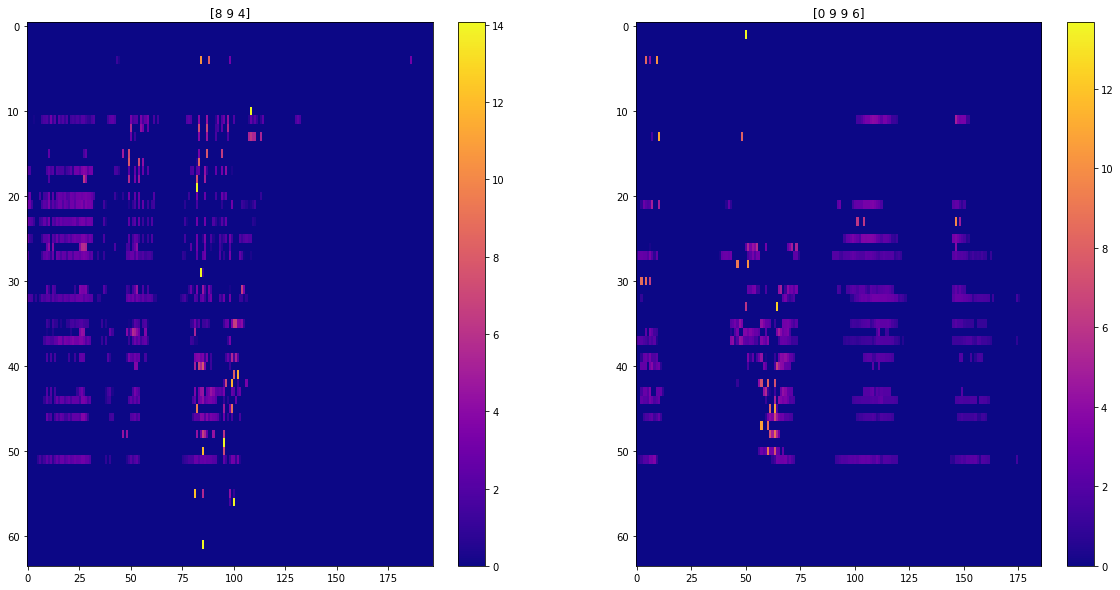

In [116]:
from python_speech_features import delta
subset = 'train'

h5 = tables.open_file('/Data/DATASETS/CAESAR_TIDIGITS/tidigits_spk_sep_log777_v07.h5', 'r')
# h5 = tables.open_file('/Data/DATASETS/CAESAR_TIDIGITS/tidigits_kaldi_fbank.h5', 'r')

spk_sep = h5.list_nodes(os.path.join(os.sep, 'default', subset))

IDX = 376

print spk_sep[0].label[IDX * 2]
print spk_sep[0].label[IDX * 2 + 1]

f, ax = plt.subplots(1, 2, figsize=(20,10))

A = np.reshape(spk_sep[0].features[IDX * 2], spk_sep[0].feature_shape[IDX * 2]).T
B = np.reshape(spk_sep[0].features[IDX * 2 + 1], spk_sep[0].feature_shape[IDX * 2 + 1]).T

# A = np.concatenate([A, delta(A.T, 2).T, delta(delta(A.T, 2), 2).T], 0)

# A -= np.mean(A, 1, keepdims=True)
# B -= np.mean(B, 1, keepdims=True)

A /= (np.std(A, 1, keepdims=True) + 1e-8)
B /= (np.std(B, 1, keepdims=True) + 1e-8)
# A /= np.max(np.abs(A))
# B /= np.max(np.abs(B))


a = ax[0].imshow(A, aspect='auto', cmap=plt.get_cmap('plasma'))
ax[0].set_title(spk_sep[0].label[IDX * 2])
plt.colorbar(a, ax=ax[0])
a = ax[1].imshow(B, aspect='auto', cmap=plt.get_cmap('plasma'))
ax[1].set_title(spk_sep[0].label[IDX * 2 + 1])
plt.colorbar(a, ax=ax[1])

In [12]:
from tqdm import tqdm_notebook as tqdm
subset = 'test'

h5 = tables.open_file('/Data/DATASETS/CAESAR_TIDIGITS/tidigits_spk_sep_77_v07.h5', 'r')
spk_sep = h5.list_nodes(os.path.join(os.sep, 'default', subset))

max_ = 0.
min_ = 1e20

for idx in tqdm(range(4000)):
    max_ = max(np.max(spk_sep[0].features[idx]), max_)
    min_ = min(np.min(spk_sep[0].features[idx]), min_)
    
print min_
print max_


-6.0
1.1801807


In [109]:

def precision(tp, fp):
    return tp / (tp + fp)

def recall(tp, fn):
    return tp / (tp + fn)

def fscore(tp, fp, tn, fn, beta=1):
    return (1 + beta**2) * (precision(tp, fp) * recall(tp, fn)) / ((beta ** 2) * precision(tp, fp) + recall(tp, fn))

In [308]:
def do_f_score(digit, v):
    with open('pytorch/{}{}{}_wake_coll{}.txt'.format(digit, digit, digit, v)) as f:
        tp = 0.
        tn = 0.
        fp = 0.
        fn = 0.

        for l in f.readlines():
            a, b = l.split('%')
            a = ''.join(a.split('-'))
            b = ''.join(b.split('-'))
            if len([x for x in a if x == '1']) == 1:
                for i, k in enumerate(a):
                    if k == '1':
                        if len(b) < (i + 1):
                            fn += 1
                        elif b[i] == '1':
                            tp += 1
                        elif b[i] == '2':
                            fn += 1
                    if k == '2':
                        if len(b) < (i + 1):
                            pass
                        elif b[i] == '2':
                            tn += 1
                        elif b[i] == '1':
                            fp += 1
                            
    return precision(tp, fp),  recall(tp, fn), fscore(tp, fp, tn, fn, beta=0.5)

In [309]:
res = {'precision': {}, 'recall': {}, 'fscore': {}}
for i in [0, 1,2,3,4,5,6,7,8,9]:
    res['precision'][i] = []
    res['recall'][i] = []
    res['fscore'][i] = []
    
    for v in ['', '_v2', '_v3']:
#         if i == 1:
#             _p, _r, _f = do_f_score(i, v, t='1', f='2')
#         else:
        _p, _r, _f = do_f_score(i, v)
        res['precision'][i].append(_p)
        res['recall'][i].append(_r)
        res['fscore'][i].append(_f)



In [310]:
for i in [0, 1,2,3,4,5,6,7,8,9]:
    print "*" * 99
    print i
    print "{} // {}".format(np.mean(res['precision'][i]), np.std(res['precision'][i]))
    print "{} // {}".format(np.mean(res['recall'][i]), np.std(res['recall'][i]))
    print "{} // {}".format(np.mean(res['fscore'][i]), np.std(res['fscore'][i]))


***************************************************************************************************
0
0.999189602841 // 0.000334434400232
0.98499074253 // 0.0048752957746
0.996313472916 // 0.00114920543143
***************************************************************************************************
1
0.887376127461 // 0.0156911062429
0.926020692667 // 0.0575234029722
0.894329411063 // 0.0191377483604
***************************************************************************************************
2
0.919219420256 // 0.00518600006878
0.946312137848 // 0.00764729511685
0.924486989599 // 0.00293160364015
***************************************************************************************************
3
0.876101528919 // 0.0144364750434
0.927888356073 // 0.0167047473468
0.885829695983 // 0.00883472098336
***************************************************************************************************
4
0.925767997537 // 0.00131266033478
0.93855124258 // 0.00833537407127
0.92828

In [261]:
import h5py
h5file = h5py.File('/Data/DATASETS/CAESAR_TIDIGITS/n-tidigits.hdf5', 'r')
print h5file.keys()
print len(h5file['train_addresses'])
k = h5file['train_addresses'].keys()[0]
print h5file['train_labels'][1]
h5file.close()

[u'test_addresses', u'test_labels', u'test_timestamps', u'train_addresses', u'train_labels', u'train_timestamps']
8621
man-jr-a-9o8o
